# TASK 2

#### Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action='ignore')

In [5]:
pd.set_option('display.max_columns',10,'display.width',1000)
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


In [7]:
train.shape

(891, 12)

In [9]:
test.shape

(418, 11)

In [11]:
#Checking for Null values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [17]:
#Description of data set
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,...,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,...,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,...,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,...,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,...,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,...,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,...,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,...,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,...,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,...,0.000000,NaN,31.000000,NaN,NaN


In [23]:
train.groupby('Survived').mean()

TypeError: Could not convert Braund, Mr. Owen HarrisAllen, Mr. William HenryMoran, Mr. JamesMcCarthy, Mr. Timothy JPalsson, Master. Gosta LeonardSaundercock, Mr. William HenryAndersson, Mr. Anders JohanVestrom, Miss. Hulda Amanda AdolfinaRice, Master. EugeneVander Planke, Mrs. Julius (Emelia Maria Vandemoortele)Fynney, Mr. Joseph JPalsson, Miss. Torborg DaniraEmir, Mr. Farred ChehabFortune, Mr. Charles AlexanderTodoroff, Mr. LalioUruchurtu, Don. Manuel EWheadon, Mr. Edward HMeyer, Mr. Edgar JosephHolverson, Mr. Alexander OskarCann, Mr. Ernest CharlesVander Planke, Miss. Augusta MariaAhlin, Mrs. Johan (Johanna Persdotter Larsson)Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)Kraeff, Mr. TheodorRogers, Mr. William JohnLennon, Mr. DenisSamaan, Mr. YoussefArnold-Franchi, Mrs. Josef (Josefine Franchi)Panula, Master. Juha NiiloNosworthy, Mr. Richard CaterOstby, Mr. Engelhart CorneliusNovel, Mr. MansouerGoodwin, Master. William FrederickSirayanian, Mr. OrsenHarris, Mr. Henry BirkhardtSkoog, Master. HaraldStewart, Mr. Albert ACrease, Mr. Ernest JamesKink, Mr. VincenzJenkin, Mr. Stephen CurnowGoodwin, Miss. Lillian AmyHood, Mr. Ambrose JrChronopoulos, Mr. ApostolosMoen, Mr. Sigurd HansenStaneff, Mr. IvanMoutal, Mr. Rahamin HaimWaelens, Mr. AchilleCarrau, Mr. Francisco MFord, Mr. William NealSlocovski, Mr. Selman FrancisCelotti, Mr. FrancescoChristmann, Mr. EmilAndreasson, Mr. Paul EdvinChaffee, Mr. Herbert FullerDean, Mr. Bertram FrankCoxon, Mr. DanielShorney, Mr. Charles JosephGoldschmidt, Mr. George BKantor, Mr. SinaiPetranec, Miss. MatildaPetroff, Mr. Pastcho ("Pentcho")White, Mr. Richard FrasarJohansson, Mr. Gustaf JoelGustafsson, Mr. Anders VilhelmMionoff, Mr. StoytchoRekic, Mr. TidoPorter, Mr. Walter ChamberlainZabour, Miss. HileniBarton, Mr. David JohnJussila, Miss. KatriinaAttalah, Miss. MalakePekoniemi, Mr. EdvardConnors, Mr. PatrickTurpin, Mr. William John RobertBaxter, Mr. Quigg EdmondAndersson, Miss. Ellis Anna MariaHickman, Mr. Stanley GeorgeMoore, Mr. Leonard CharlesNasser, Mr. NicholasWhite, Mr. Percival WaylandMcMahon, Mr. MartinEkstrom, Mr. JohanDrazenoic, Mr. JozefCoelho, Mr. Domingos FernandeoRobins, Mrs. Alexander A (Grace Charity Laury)Sobey, Mr. Samuel James HaydenRichard, Mr. EmileFutrelle, Mr. Jacques HeathOsen, Mr. Olaf ElonGiglio, Mr. VictorBoulos, Mrs. Joseph (Sultana)Burke, Mr. JeremiahAndrew, Mr. Edgardo SamuelNicholls, Mr. Joseph CharlesFord, Miss. Robina Maggie "Ruby"Navratil, Mr. Michel ("Louis M Hoffman")Byles, Rev. Thomas Roussel DavidsBateman, Rev. Robert JamesMeo, Mr. Alfonzovan Billiard, Mr. Austin BlylerOlsen, Mr. Ole MartinWilliams, Mr. Charles DuaneCorn, Mr. HarrySmiljanic, Mr. MileSage, Master. Thomas HenryCribb, Mr. John HatfieldBengtsson, Mr. John ViktorCalic, Mr. JovoPanula, Master. Eino ViljamiSkoog, Mrs. William (Anna Bernhardina Karlsson)Baumann, Mr. John DLing, Mr. LeeVan der hoef, Mr. WyckoffRice, Master. ArthurSivola, Mr. Antti WilhelmSmith, Mr. James ClinchKlasen, Mr. Klas AlbinLefebre, Master. Henry ForbesIsham, Miss. Ann ElizabethHale, Mr. ReginaldLeonard, Mr. LionelSage, Miss. Constance GladysPernot, Mr. ReneAsplund, Master. Clarence Gustaf HugoRood, Mr. Hugh RoscoeBourke, Mr. JohnTurcin, Mr. StjepanCarbines, Mr. WilliamMernagh, Mr. RobertOlsen, Mr. Karl Siegwart AndreasYrois, Miss. Henriette ("Mrs Harbeck")Vande Walle, Mr. Nestor CyrielSage, Mr. FrederickJohanson, Mr. Jakob AlfredYouseff, Mr. GeriousStrom, Miss. Telma MatildaBackstrom, Mr. Karl AlfredAli, Mr. AhmedPerkin, Mr. John HenryGivard, Mr. Hans KristensenKiernan, Mr. PhilipJacobsohn, Mr. Sidney SamuelHarris, Mr. WalterBracken, Mr. James HGreen, Mr. George HenryNenkoff, Mr. ChristoBerglund, Mr. Karl Ivar SvenLovell, Mr. John Hall ("Henry")Fahlstrom, Mr. Arne JonasLefebre, Miss. MathildeLarsson, Mr. Bengt EdvinSjostedt, Mr. Ernst AdolfLeyson, Mr. Robert William NormanHarknett, Miss. Alice PhoebeHold, Mr. StephenPengelly, Mr. Frederick WilliamHunt, Mr. George HenryZabour, Miss. ThamineColeridge, Mr. Reginald CharlesMaenpaa, Mr. Matti AlexanteriAttalah, Mr. SleimanMinahan, Dr. William EdwardLindahl, Miss. Agda Thorilda ViktoriaCarter, Rev. Ernest CourtenayReed, Mr. James GeorgeStrom, Mrs. Wilhelm (Elna Matilda Persson)Stead, Mr. William ThomasLobb, Mr. William ArthurRosblom, Mrs. Viktor (Helena Wilhelmina)Smith, Mr. ThomasTaussig, Mr. EmilHarrison, Mr. WilliamHenry, Miss. DeliaReeves, Mr. DavidPanula, Mr. Ernesti ArvidCairns, Mr. AlexanderNatsch, Mr. Charles HLindblom, Miss. Augusta CharlottaParkes, Mr. Francis "Frank"Rice, Master. EricDuane, Mr. FrankOlsson, Mr. Nils Johan Goranssonde Pelsmaeker, Mr. AlfonsSmith, Mr. Richard WilliamStankovic, Mr. IvanNaidenoff, Mr. PenkoLevy, Mr. Rene JacquesHaas, Miss. AloisiaMineff, Mr. IvanLewy, Mr. Ervin GHanna, Mr. MansourAllison, Miss. Helen LoraineJohnson, Mr. William Cahoone JrWilliams, Mr. Howard Hugh "Harry"Abelson, Mr. SamuelLahtinen, Mrs. William (Anna Sylfven)Hendekovic, Mr. IgnjacHart, Mr. BenjaminMoraweck, Dr. ErnestDennis, Mr. SamuelDanoff, Mr. YotoSage, Mr. George John JrNysveen, Mr. Johan HansenPartner, Mr. AustenGraham, Mr. George EdwardVander Planke, Mr. Leo EdmondusDenkoff, Mr. MittoPears, Mr. Thomas ClintonBlackwell, Mr. Stephen WeartCollander, Mr. Erik GustafSedgwick, Mr. Charles Frederick WaddingtonFox, Mr. Stanley HubertDimic, Mr. JovanOdahl, Mr. Nils MartinWilliams-Lambert, Mr. Fletcher FellowsElias, Mr. TannousArnold-Franchi, Mr. JosefYousif, Mr. WazliVanden Steen, Mr. Leo PeterFunk, Miss. Annie ClemmerSkoog, Mr. Wilhelmdel Carlo, Mr. SebastianoBarbara, Mrs. (Catherine David)Asim, Mr. AdolaO'Brien, Mr. ThomasAdahl, Mr. Mauritz Nils MartinWiklund, Mr. Jakob AlfredBeavan, Mr. William ThomasRinghini, Mr. SantePalsson, Miss. Stina ViolaWidener, Mr. Harry ElkinsBetros, Mr. TannousGustafsson, Mr. Karl GideonTikkanen, Mr. JuhoPlotcharsky, Mr. VasilDavies, Mr. Charles HenryGoodwin, Master. Sidney LeonardSadlier, Mr. MatthewGustafsson, Mr. Johan BirgerJohansson, Mr. ErikOlsson, Miss. ElinaMcKane, Mr. Peter DavidPain, Dr. AlfredAdams, Mr. JohnJussila, Miss. Mari AinaHakkarainen, Mr. Pekka PietariOreskovic, Miss. MarijaGale, Mr. ShadrachWidegren, Mr. Carl/Charles PeterBirkeland, Mr. Hans Martin MonsenLefebre, Miss. IdaSdycoff, Mr. TodorHart, Mr. HenryCunningham, Mr. Alfred FlemingMeek, Mrs. Thomas (Annie Louise Rowley)Matthews, Mr. William JohnVan Impe, Miss. CatharinaGheorgheff, Mr. StanioCharters, Mr. DavidZimmerman, Mr. LeoDanbom, Mrs. Ernst Gilbert (Anna Sigrid Maria Brogren)Rosblom, Mr. Viktor RichardWiseman, Mr. PhillippeFlynn, Mr. JamesKallio, Mr. Nikolai ErlandSilvey, Mr. William BairdFord, Miss. Doolina Margaret "Daisy"Fortune, Mr. MarkKvillner, Mr. Johan Henrik JohannessonHampe, Mr. LeonPetterson, Mr. Johan EmilWest, Mr. Edwy ArthurHagland, Mr. Ingvald Olai OlsenForeman, Mr. Benjamin LaventallPeduzzi, Mr. JosephMillet, Mr. Francis DavisO'Connor, Mr. MauriceMorley, Mr. WilliamGee, Mr. Arthur HMilling, Mr. Jacob ChristianMaisner, Mr. SimonGoncalves, Mr. Manuel EstanslasCampbell, Mr. WilliamSmart, Mr. John MontgomeryScanlan, Mr. JamesKeefe, Mr. ArthurCacic, Mr. LukaStrandberg, Miss. Ida SofiaClifford, Mr. George QuincyRenouf, Mr. Peter HenryBraund, Mr. Lewis RichardKarlsson, Mr. Nils AugustGoodwin, Master. Harold VictorFrost, Mr. Anthony Wood "Archie"Rouse, Mr. Richard HenryLefebre, Miss. JeannieKent, Mr. Edward AustinSomerton, Mr. Francis WilliamHagland, Mr. Konrad Mathias ReiersenWindelov, Mr. EinarMolson, Mr. Harry MarklandArtagaveytia, Mr. RamonStanley, Mr. Edward RolandYousseff, Mr. GeriousShellard, Mr. Frederick WilliamAllison, Mrs. Hudson J C (Bessie Waldo Daniels)Svensson, Mr. OlofCalic, Mr. PetarCanavan, Miss. MaryO'Sullivan, Miss. Bridget MaryLaitinen, Miss. Kristina SofiaPenasco y Castellana, Mr. Victor de SatodeOlsen, Mr. Henry MargidoWebber, Mr. JamesColeff, Mr. SatioWalker, Mr. William AndersonRyan, Mr. PatrickPavlovic, Mr. StefoVovk, Mr. JankoLahoud, Mr. SarkisKassem, Mr. FaredFarrell, Mr. JamesFarthing, Mr. JohnSalonen, Mr. Johan WernerHocking, Mr. Richard GeorgeToufik, Mr. NakliElias, Mr. Joseph JrCacic, Miss. MarijaButt, Major. Archibald WillinghamRisien, Mr. Samuel BeardAndersson, Miss. Ingeborg ConstanziaAndersson, Miss. Sigrid ElisabethDouglas, Mr. Walter DonaldNicholson, Mr. Arthur ErnestGoldsmith, Mr. Frank JohnSharp, Mr. Percival James RO'Brien, Mr. TimothyWright, Mr. GeorgeRobbins, Mr. VictorMorrow, Mr. Thomas RowanSivic, Mr. HuseinNorman, Mr. Robert DouglasSimmons, Mr. JohnMeanwell, Miss. (Marion Ogden)Davies, Mr. Alfred JStoytcheff, Mr. IliaPalsson, Mrs. Nils (Alma Cornelia Berglund)Doharr, Mr. TannousRush, Mr. Alfred George JohnPatchett, Mr. GeorgeCaram, Mrs. Joseph (Maria Elias)Downton, Mr. William JamesRoss, Mr. John HugoPaulner, Mr. UscherJarvis, Mr. John DenzilGilinski, Mr. EliezerMurdlin, Mr. JosephRintamaki, Mr. MattiElsbury, Mr. William JamesBourke, Miss. MaryChapman, Mr. John HenryVan Impe, Mr. Jean BaptisteJohnson, Mr. AlfredBoulos, Mr. HannaSlabenoff, Mr. PetcoHarrington, Mr. Charles HTorber, Mr. Ernst WilliamLindell, Mr. Edvard BengtssonKaraic, Mr. MilanAndersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)Jardin, Mr. Jose NetoHorgan, Mr. JohnBrocklebank, Mr. William AlfredDanbom, Mr. Ernst GilbertLobb, Mrs. William Arthur (Cordelia K Stanlick)Gavey, Mr. LawrenceYasbeck, Mr. AntoniHansen, Mr. Henry DamsgaardBowen, Mr. David John "Dai"Sutton, Mr. FrederickKirkland, Rev. Charles LeonardBostandyeff, Mr. GuentchoO'Connell, Mr. Patrick DLundahl, Mr. Johan SvenssonParr, Mr. William Henry MarshSkoog, Miss. MabelLeinonen, Mr. Antti GustafCollyer, Mr. HarveyPanula, Mrs. Juha (Maria Emilia Ojala)Thorneycroft, Mr. PercivalJensen, Mr. Hans PederSkoog, Miss. Margit ElizabethCor, Mr. LiudevitWilley, Mr. EdwardMitkoff, Mr. MitoKalvik, Mr. Johannes HalvorsenHegarty, Miss. Hanora "Nora"Hickman, Mr. Leonard MarkRadeff, Mr. AlexanderBourke, Mrs. John (Catherine)Eitemiller, Mr. George FloydNewell, Mr. Arthur WebsterBadt, Mr. MohamedColley, Mr. Edward PomeroyColeff, Mr. PejuHickman, Mr. LewisButler, Mr. Reginald FentonRommetvedt, Mr. Knud PaustCook, Mr. JacobDavidson, Mr. ThorntonMitchell, Mr. Henry MichaelWatson, Mr. Ennis HastingsEdvardsson, Mr. Gustaf HjalmarSawyer, Mr. Frederick CharlesGoodwin, Mrs. Frederick (Augusta Tyler)Peters, Miss. KatieOlsvigen, Mr. Thor AndersonGoodwin, Mr. Charles EdwardBrown, Mr. Thomas William SolomonLaroche, Mr. Joseph Philippe LemercierPanula, Mr. Jaako ArnoldDakic, Mr. BrankoFischer, Mr. Eberhard ThelanderSaad, Mr. KhalilWeir, Col. JohnChapman, Mr. Charles HenryKelly, Mr. JamesThayer, Mr. John BorlandHumblen, Mr. Adolf Mathias Nicolai OlsenBarbara, Miss. SaiideGallagher, Mr. MartinHansen, Mr. Henrik JuulMorley, Mr. Henry Samuel ("Mr Henry Marshall")Klaber, Mr. HermanLarsson, Mr. August ViktorGreenberg, Mr. SamuelSoholt, Mr. Peter Andreas Lauritz AndersenMcEvoy, Mr. MichaelJohnson, Mr. Malkolm JoackimJensen, Mr. Svend LauritzGillespie, Mr. William HenryHodges, Mr. Henry PriceOreskovic, Mr. LukaBryhl, Mr. Kurt Arnold GottfridIlmakangas, Miss. Pieta SofiaHassan, Mr. Houssein G NKnight, Mr. Robert JBerriman, Mr. William JohnTroupiansky, Mr. Moses AaronWilliams, Mr. LeslieFord, Mrs. Edward (Margaret Ann Watson)Ivanoff, Mr. KanioNankoff, Mr. MinkoCavendish, Mr. Tyrell WilliamMcNamee, Mr. NealCrosby, Capt. Edward GiffordAbbott, Mr. Rossmore EdwardMarvin, Mr. Daniel WarnerConnaghton, Mr. MichaelVande Velde, Mr. Johannes JosephJonkoff, Mr. LalioCarlsson, Mr. August SigfridBailey, Mr. Percy AndrewTheobald, Mr. Thomas LeonardGarfirth, Mr. JohnNirva, Mr. Iisakki Antino AijoEklund, Mr. Hans LinusBrewe, Dr. Arthur JacksonMangan, Miss. MaryMoran, Mr. Daniel JGronnestad, Mr. Daniel DanielsenLievens, Mr. Rene AimeJensen, Mr. Niels PederMack, Mrs. (Mary)Elias, Mr. DiboMyhrman, Mr. Pehr Fabian Oliver MalkolmTobin, Mr. RogerKilgannon, Mr. Thomas JLong, Mr. Milton ClydeJohnston, Mr. Andrew GAli, Mr. WilliamHarmer, Mr. Abraham (David Lishin)Rice, Master. George HughGuggenheim, Mr. BenjaminKeane, Mr. Andrew "Andy"Gaskell, Mr. AlfredSage, Miss. Stella AnnaHoyt, Mr. William FisherDantcheff, Mr. RistiuOtter, Mr. RichardIbrahim Shawah, Mr. YousseffVan Impe, Mrs. Jean Baptiste (Rosalie Paula Govaert)Ponesell, Mr. MartinJohansson, Mr. Karl JohanAndrews, Mr. Thomas JrPettersson, Miss. Ellen NataliaMeyer, Mr. AugustAlexander, Mr. WilliamLester, Mr. JamesSlemen, Mr. Richard JamesAndersson, Miss. Ebba Iris AlfridaTomlin, Mr. Ernest PortageFry, Mr. RichardHeininen, Miss. Wendla MariaMallet, Mr. AlbertHolm, Mr. John Fredrik AlexanderSkoog, Master. Karl ThorstenReuchlin, Jonkheer. John GeorgePanula, Master. Urho AbrahamFlynn, Mr. JohnLam, Mr. LenSaad, Mr. AminAugustsson, Mr. AlbertAllum, Mr. Owen GeorgePasic, Mr. JakobSirota, Mr. MauriceAlhomaki, Mr. Ilmari RudolfMudd, Mr. Thomas CharlesLemberopolous, Mr. Peter LCulumovic, Mr. JesoAbbing, Mr. AnthonySage, Mr. Douglas BullenMarkoff, Mr. MarinHarper, Rev. JohnAndersson, Master. Sigvard Harald EliasSvensson, Mr. JohanBoulos, Miss. NourelainCarter, Mrs. Ernest Courtenay (Lilian Hughes)Razi, Mr. RaihedHansen, Mr. Claus PeterGiles, Mr. Frederick EdwardSage, Miss. Dorothy Edith "Dolly"Gill, Mr. John WilliamRoebling, Mr. Washington Augustus IIvan Melkebeke, Mr. PhilemonBalkic, Mr. CerinCarlsson, Mr. Frans OlofVander Cruyssen, Mr. VictorGustafsson, Mr. Alfred OssianPetroff, Mr. NedelioLaleff, Mr. KristoMarkun, Mr. JohannDahlberg, Miss. Gerda UlrikaBanfield, Mr. Frederick JamesSutehall, Mr. Henry JrRice, Mrs. William (Margaret Norton)Montvila, Rev. JuozasJohnston, Miss. Catherine Helen "Carrie"Dooley, Mr. Patrick to numeric

In [91]:
correlation_matrix = train.corr(numeric_only=True)
print(correlation_matrix)


             PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652  0.012658
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


In [25]:
male_ind = len(train[train['Sex'] == 'male'])
print("No of Males in Titanic:",male_ind)

No of Males in Titanic: 577


In [27]:
female_ind = len(train[train['Sex'] == 'female'])
print("No of Females in Titanic:",female_ind)

No of Females in Titanic: 314


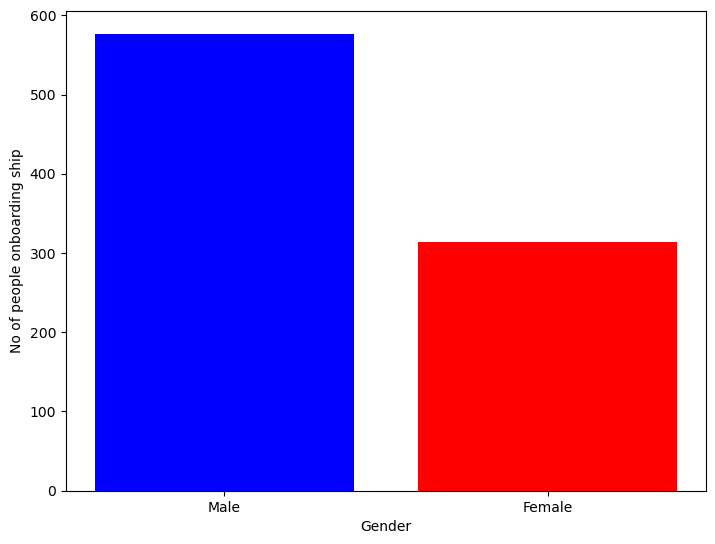

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
index = [577, 314]
ax.bar(gender, index, color=['blue', 'red'])  
plt.xlabel("Gender")
plt.ylabel("No of people onboarding ship")
plt.show()


In [33]:
alive = len(train[train['Survived'] == 1])
dead = len(train[train['Survived'] == 0])

In [35]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


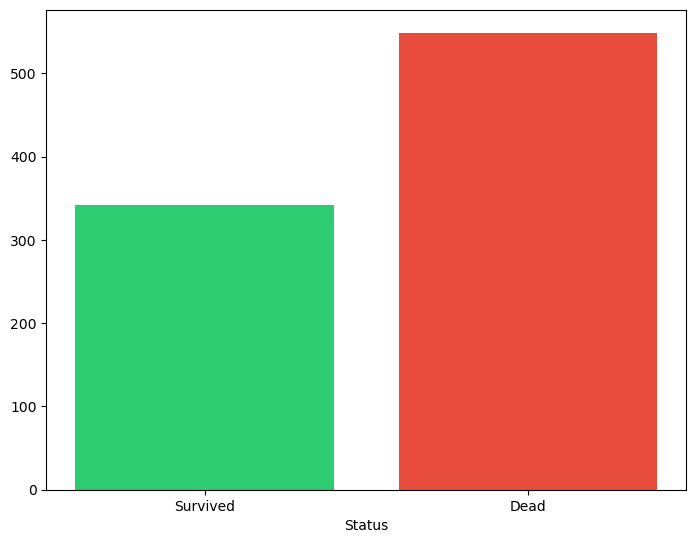

In [37]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ['Survived','Dead']
ind = [alive,dead]
ax.bar(status,ind, color=['#2ecc71', '#e74c3c'])
plt.xlabel("Status")
plt.show()


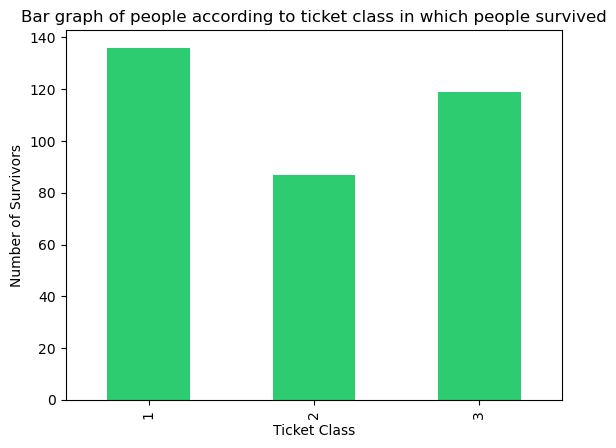

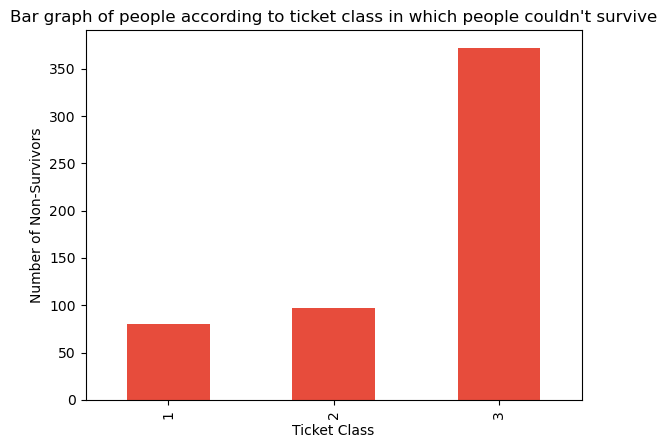

In [39]:
plt.figure(1)
train.loc[train['Survived'] == 1, 'Pclass'].value_counts().sort_index().plot.bar(color='#2ecc71')
plt.title('Bar graph of people according to ticket class in which people survived')
plt.xlabel('Ticket Class')
plt.ylabel('Number of Survivors')

plt.figure(2)
train.loc[train['Survived'] == 0, 'Pclass'].value_counts().sort_index().plot.bar(color='#e74c3c')
plt.title('Bar graph of people according to ticket class in which people couldn\'t survive')
plt.xlabel('Ticket Class')
plt.ylabel('Number of Non-Survivors')

plt.show()


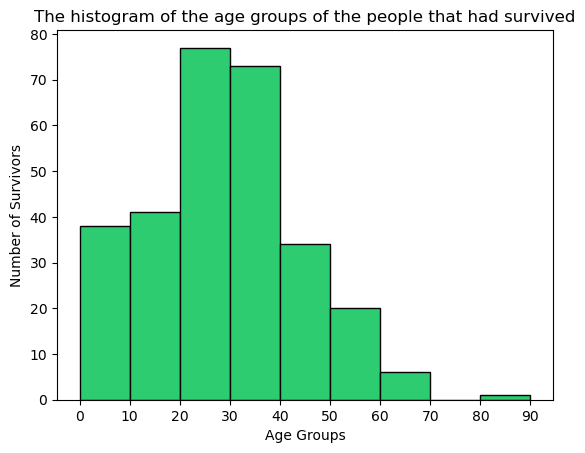

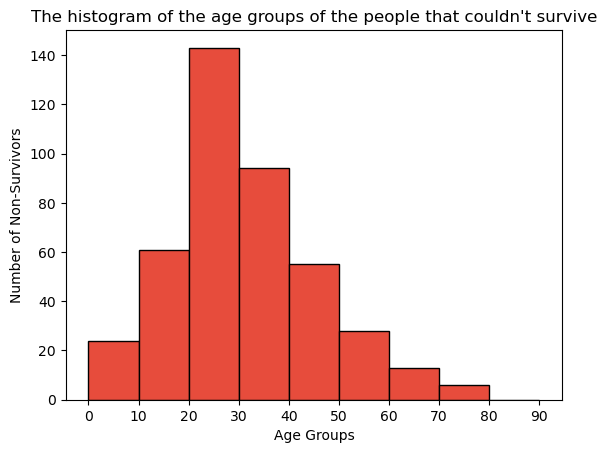

In [49]:
plt.figure(1)
age_survived = train.loc[train.Survived == 1, 'Age']
plt.title('The histogram of the age groups of the people that had survived')
plt.hist(age_survived, bins=np.arange(0, 100, 10), color='#2ecc71', edgecolor='black')
plt.xticks(np.arange(0, 100, 10))
plt.xlabel('Age Groups')
plt.ylabel('Number of Survivors')

plt.figure(2)
age_not_survived = train.loc[train.Survived == 0, 'Age']
plt.title('The histogram of the age groups of the people that couldn\'t survive')
plt.hist(age_not_survived, bins=np.arange(0, 100, 10), color='#e74c3c', edgecolor='black')
plt.xticks(np.arange(0, 100, 10))
plt.xlabel('Age Groups')
plt.ylabel('Number of Non-Survivors')

plt.show()


In [41]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [43]:
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [45]:
train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


In [47]:
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


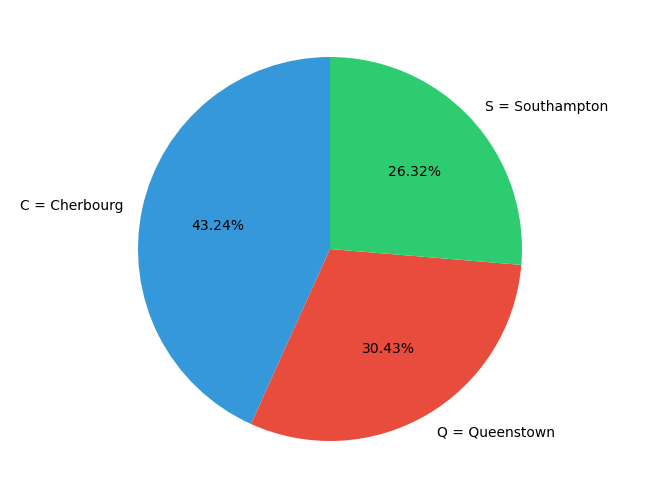

In [63]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571, 0.389610, 0.336957]
ax.pie(s, labels=l, autopct='%1.2f%%', colors=['#3498db', '#e74c3c', '#2ecc71'], startangle=90)
plt.show()


In [51]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,...,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,...,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,...,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,...,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,...,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,...,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,...,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,...,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,...,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,...,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,...,0.000000,NaN,31.500000,NaN,NaN


In [53]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [55]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [89]:
if 'Name' in train.columns:
    train = train.drop(['Name'], axis=1)

if 'Name' in test.columns:
    test = test.drop(['Name'], axis=1)


In [65]:
#Feature Selection
column_train=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
#training values
X=train[column_train]
#target value
Y=train['Survived']

In [67]:
X['Age'].isnull().sum()
X['Pclass'].isnull().sum()
X['SibSp'].isnull().sum()
X['Parch'].isnull().sum()
X['Fare'].isnull().sum()
X['Sex'].isnull().sum()
X['Embarked'].isnull().sum()

2

In [69]:
X['Age']=X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

0

In [71]:
X['Embarked'] = train['Embarked'].fillna(method ='pad')
X['Embarked'].isnull().sum()

0

In [73]:
d={'male':0, 'female':1}
X['Sex']=X['Sex'].apply(lambda x:d[x])
X['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [75]:
e={'C':0, 'Q':1 ,'S':2}
X['Embarked']=X['Embarked'].apply(lambda x:e[x])
X['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [79]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.7574626865671642


In [81]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[130  26]
 [ 39  73]]


In [83]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train,Y_train)

pred_y = model1.predict(X_test)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(Y_test,pred_y))

Acc= 0.6604477611940298


In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,pred_y)
print(confusion_mat)
print(classification_report(Y_test,pred_y))

[[149   7]
 [ 84  28]]
              precision    recall  f1-score   support

           0       0.64      0.96      0.77       156
           1       0.80      0.25      0.38       112

    accuracy                           0.66       268
   macro avg       0.72      0.60      0.57       268
weighted avg       0.71      0.66      0.61       268



In [87]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.6567164179104478


In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred2)
print(confusion_mat)
print(classification_report(Y_test,y_pred2))

[[127  29]
 [ 62  50]]
              precision    recall  f1-score   support

           0       0.67      0.81      0.74       156
           1       0.63      0.45      0.52       112

    accuracy                           0.66       268
   macro avg       0.65      0.63      0.63       268
weighted avg       0.66      0.66      0.65       268



In [41]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))

Accuracy Score: 0.7686567164179104


In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred3)
print(confusion_mat)
print(classification_report(Y_test,y_pred3))

[[129  27]
 [ 35  77]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       156
           1       0.74      0.69      0.71       112

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [43]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train,Y_train)
y_pred4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred4))

Accuracy Score: 0.7425373134328358


In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred4)
print(confusion_mat)
print(classification_report(Y_test,y_pred4))

[[132  24]
 [ 45  67]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.79       156
           1       0.74      0.60      0.66       112

    accuracy                           0.74       268
   macro avg       0.74      0.72      0.73       268
weighted avg       0.74      0.74      0.74       268



In [45]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [0.75,0.66,0.76,0.66,0.74]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.76,Naive Bayes
0.75,Logistic Regression
0.74,Decision Tree
0.66,Support Vector Machines
0.66,KNN
